In [1]:
import numpy as np 
import pandas as pd


## Loading Training Data

In [2]:
train = pd.read_csv('train.csv',sep=';')

train.head()

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.528,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.680,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.832,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.984,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.136,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0


In [3]:
len(train.WELL.unique())

98

In [4]:
train.shape

(1170511, 29)

### Lithological Keys 

I am thinking of mapping it to the numbers and then encoding it since it is reall importance and to prevent the algos from assuming numerical importance to the feature.

In [5]:
lithology_keys = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

In [6]:
train['FORCE_2020_LITHOFACIES_LITHOLOGY'].unique()

array([65000, 30000, 65030, 70000, 99000, 80000, 86000, 74000, 70032,
       90000, 88000, 93000])

### Missing Data points

In [7]:
train.isna().sum()/len(train) * 100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.920538
Y_LOC                                 0.920538
Z_LOC                                 0.920538
GROUP                                 0.109183
FORMATION                            11.703777
CALI                                  7.507576
RSHA                                 46.121822
RMED                                  3.331280
RDEP                                  0.941042
RHOB                                 13.777658
GR                                    0.000000
SGR                                  94.074981
NPHI                                 34.608987
PEF                                  42.615490
DTC                                   6.908350
SP                                   26.164983
BS                                   41.678720
ROP                                  54.287401
DTS                                  85.082327
DCAL         

In [8]:
test = pd.read_csv('test.csv',sep=';')

test.isna().sum()/len(test) * 100

WELL           0.000000
DEPTH_MD       0.000000
X_LOC          0.043133
Y_LOC          0.043133
Z_LOC          0.043133
GROUP          0.000000
FORMATION      5.171582
CALI           4.126884
RSHA          71.417397
RMED           0.429137
RDEP           0.043133
RHOB          12.398930
GR             0.000000
SGR          100.000000
NPHI          23.937391
PEF           17.021479
DTC            0.601670
SP            51.291068
BS            51.044698
ROP           50.056292
DTS           68.403199
DCAL          90.119603
DRHO          18.444870
MUDWEIGHT     85.181963
RMIC          91.727224
ROPA          59.213662
RXO           78.179053
dtype: float64

In [9]:
train.shape

(1170511, 29)

In [10]:
test.shape

(136786, 27)

In [11]:
#dropping missing values that are greater than 65%


def missing_values(df,percentage):
    columns = df.columns
    percentage_missing = df.isna().sum() * 100 / len(df)
    
    
    missing_values_df = pd.DataFrame({'column_name':columns,
                                     'percentage_missing': percentage_missing})
    
    missing_drop = list(missing_values_df[missing_values_df.percentage_missing > percentage].column_name)
    
#     df= df.drop(missing_drop,axis=1,inplace=True)
    return missing_drop

In [12]:
missing_values(train,70)

['SGR', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']

In [13]:
missing_values(test,70)

['RSHA', 'SGR', 'DCAL', 'MUDWEIGHT', 'RMIC', 'RXO']

In [14]:
train_test=pd.concat([train,test])

In [15]:
train_test

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000.0,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000.0,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000.0,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000.0,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136781,35/9-8,3224.3896,536225.93750,6794880.5,-3199.876465,BAAT GP.,Rannoch Fm.,8.497800,NaN,6.231942,...,26.615782,118.669212,NaN,0.063478,NaN,2.618309,33.523922,NaN,NaN,NaN
136782,35/9-8,3224.5416,536225.93750,6794880.5,-3200.028320,BAAT GP.,Rannoch Fm.,8.497800,NaN,6.038777,...,25.647141,118.468925,NaN,0.056791,NaN,2.620221,32.643795,NaN,NaN,NaN
136783,35/9-8,3224.6936,536225.93750,6794880.5,-3200.180176,BAAT GP.,Rannoch Fm.,8.497800,NaN,5.503983,...,23.929407,118.163177,NaN,0.002499,NaN,2.629171,31.763380,NaN,NaN,NaN
136784,35/9-8,3224.8456,536225.93750,6794880.5,-3200.332031,BAAT GP.,Rannoch Fm.,8.497800,NaN,4.895551,...,22.737293,117.655937,NaN,0.003363,NaN,2.521121,30.884350,NaN,NaN,NaN


In [16]:
missing_values(train_test,70)

['SGR', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']

In [17]:
#dropping missing values that are greater than 65%


def drop_missing_values(df,percentage):
    columns = df.columns
    percentage_missing = df.isna().sum() * 100 / len(df)
    
    
    missing_values_df = pd.DataFrame({'column_name':columns,
                                     'percentage_missing': percentage_missing})
    
    missing_drop = list(missing_values_df[missing_values_df.percentage_missing > percentage].column_name)
    
    df= df.drop(missing_drop,axis=1,inplace=True)
    return df

In [18]:
drop_missing_values(train_test, 70)

In [19]:
train_test.isna().sum()/len(train_test) * 100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.828733
Y_LOC                                 0.828733
Z_LOC                                 0.828733
GROUP                                 0.097759
FORMATION                            11.020296
CALI                                  7.153845
RSHA                                 48.768566
RMED                                  3.027621
RDEP                                  0.847091
RHOB                                 13.633398
GR                                    0.000000
NPHI                                 33.492389
PEF                                  39.937520
DTC                                   6.248465
SP                                   28.793992
BS                                   42.658707
ROP                                  53.844689
DRHO                                 15.901819
FORCE_2020_LITHOFACIES_LITHOLOGY     10.463269
FORCE_2020_LI

In [20]:
train_test.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
count,1.307297e+06,1.296463e+06,1.296463e+06,1.296463e+06,1.213775e+06,669747.000000,1.267717e+06,1.296223e+06,1.129068e+06,1.307297e+06,869452.000000,785195.000000,1.225611e+06,930874.000000,749621.000000,603387.000000,1.099413e+06,1.170511e+06,1.170332e+06
mean,2.217261e+03,4.837595e+05,6.684115e+06,-2.165874e+03,1.312386e+01,10.253527,4.864279e+00,9.949604e+00,2.289225e+00,7.031829e+01,0.329749,6.289937,1.128723e+02,58.852604,11.844954,124.804861,1.242410e-02,6.138598e+04,1.164258e+00
std,1.006788e+03,3.512231e+04,1.291890e+05,9.706919e+02,3.744796e+00,97.766267,5.225760e+01,1.080565e+02,2.525733e-01,3.396652e+01,0.129364,10.810816,2.973164e+01,74.220618,3.237016,1450.087274,7.088292e+00,1.389170e+04,4.451180e-01
min,1.360860e+02,4.232375e+05,6.406641e+06,-5.395563e+03,2.344000e+00,0.000100,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,-0.035822,0.099718,7.415132e+00,-999.000000,6.000000,-0.117977,-7.429339e+03,3.000000e+04,1.000000e+00
25%,1.443348e+03,4.544695e+05,6.591330e+06,-2.849464e+03,9.405167e+00,0.853920,9.156386e-01,9.096427e-01,2.094961e+00,4.722087e+01,0.239095,3.389862,8.774293e+01,32.247214,8.500000,6.320163,-8.368648e-03,6.500000e+04,1.000000e+00
50%,2.113328e+03,4.767682e+05,6.737678e+06,-2.080478e+03,1.252699e+01,1.400541,1.467655e+00,1.460703e+00,2.327247e+00,6.731985e+01,0.323705,4.316627,1.086493e+02,54.781096,12.250001,18.349997,2.569740e-03,6.500000e+04,1.000000e+00
75%,2.907089e+03,5.189633e+05,6.784908e+06,-1.416135e+03,1.634651e+01,3.065416,2.718655e+00,2.586615e+00,2.494260e+00,8.853503e+01,0.420289,5.998952,1.402602e+02,80.221329,12.250001,34.227924,2.237002e-02,6.500000e+04,1.000000e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,-1.110860e+02,2.827900e+01,2193.904541,1.988616e+03,1.999887e+03,3.457820e+00,1.076964e+03,0.999570,383.129974,3.204789e+02,526.547302,26.000002,47015.125000,2.836938e+00,9.900000e+04,3.000000e+00


In [21]:
train_test.dtypes

WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DRHO                                 float64
FORCE_2020_LITHOFACIES_LITHOLOGY     float64
FORCE_2020_LITHOFACIES_CONFIDENCE    float64
dtype: obj

In [22]:
cat=[]

for i in train_test.columns:
    if train_test[i].dtypes== 'object' and train_test[i].isna().sum() > 1:cat.append(i)

In [23]:
def cat_missing(listOfCat,df):
    for i in listOfCat:
        df[i].fillna(train[i].mode()[0], inplace=True)
    print(df[i].isna().sum())
        
        
    

In [24]:
cat_missing(cat,train_test)

0


In [25]:
train_test.isna().sum()/len(train_test) * 100

WELL                                  0.000000
DEPTH_MD                              0.000000
X_LOC                                 0.828733
Y_LOC                                 0.828733
Z_LOC                                 0.828733
GROUP                                 0.000000
FORMATION                             0.000000
CALI                                  7.153845
RSHA                                 48.768566
RMED                                  3.027621
RDEP                                  0.847091
RHOB                                 13.633398
GR                                    0.000000
NPHI                                 33.492389
PEF                                  39.937520
DTC                                   6.248465
SP                                   28.793992
BS                                   42.658707
ROP                                  53.844689
DRHO                                 15.901819
FORCE_2020_LITHOFACIES_LITHOLOGY     10.463269
FORCE_2020_LI

In [26]:
train_test1 = train_test.copy()

In [27]:
# categories=[]

# for i in train_test1.columns:
    
#     if train_test1[i].dtypes== 'object':
        
#         categories.append(i) 
#         train_test1.drop([i],inplace =True,axis =1)
    
        


In [28]:
train_test1.dtypes

WELL                                  object
DEPTH_MD                             float64
X_LOC                                float64
Y_LOC                                float64
Z_LOC                                float64
GROUP                                 object
FORMATION                             object
CALI                                 float64
RSHA                                 float64
RMED                                 float64
RDEP                                 float64
RHOB                                 float64
GR                                   float64
NPHI                                 float64
PEF                                  float64
DTC                                  float64
SP                                   float64
BS                                   float64
ROP                                  float64
DRHO                                 float64
FORCE_2020_LITHOFACIES_LITHOLOGY     float64
FORCE_2020_LITHOFACIES_CONFIDENCE    float64
dtype: obj

In [29]:
def num_missing(df):
    num=[i for i in df.columns if df[i].dtype == 'float64']
    for i in num:
        df[i].fillna(train[i].mean(), inplace=True)
    print(df[i].isna().sum())
        
        
    

In [30]:
num_missing(train_test1)

0


In [31]:
train_test1.isna().sum()

WELL                                 0
DEPTH_MD                             0
X_LOC                                0
Y_LOC                                0
Z_LOC                                0
GROUP                                0
FORMATION                            0
CALI                                 0
RSHA                                 0
RMED                                 0
RDEP                                 0
RHOB                                 0
GR                                   0
NPHI                                 0
PEF                                  0
DTC                                  0
SP                                   0
BS                                   0
ROP                                  0
DRHO                                 0
FORCE_2020_LITHOFACIES_LITHOLOGY     0
FORCE_2020_LITHOFACIES_CONFIDENCE    0
dtype: int64

In [32]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

In [33]:
train_test1["FORCE_2020_LITHOFACIES_LITHOLOGY"]=train_test1["FORCE_2020_LITHOFACIES_LITHOLOGY"].map(lithology_numbers)

In [34]:
train_test1["FORCE_2020_LITHOFACIES_LITHOLOGY"].value_counts()

2.0     720803
0.0     168937
1.0     150455
5.0      56320
3.0      33329
9.0      15245
6.0      10513
7.0       8213
10.0      3820
4.0       1688
8.0       1085
11.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [35]:
train_test1.drop(['WELL','FORCE_2020_LITHOFACIES_CONFIDENCE'],axis=1, inplace=True)

In [36]:
train_test1.columns

Index(['DEPTH_MD', 'X_LOC', 'Y_LOC', 'Z_LOC', 'GROUP', 'FORMATION', 'CALI',
       'RSHA', 'RMED', 'RDEP', 'RHOB', 'GR', 'NPHI', 'PEF', 'DTC', 'SP', 'BS',
       'ROP', 'DRHO', 'FORCE_2020_LITHOFACIES_LITHOLOGY'],
      dtype='object')

In [37]:
train_test1.FORMATION.value_counts()

Utsira Fm.               338693
Kyrre Fm.                121586
Lista Fm.                 75796
Heather Fm.               68627
Skade Fm.                 50530
                          ...  
Intra Balder Fm. Sst.       236
Broom Fm.                   235
Farsund Fm.                 171
Flekkefjord Fm.             118
Egersund Fm.                105
Name: FORMATION, Length: 69, dtype: int64

In [38]:
train_test1.GROUP.value_counts()

HORDALAND GP.       321582
SHETLAND GP.        280712
ROGALAND GP.        143553
VIKING GP.          137417
DUNLIN GP.          134475
NORDLAND GP.        126095
CROMER KNOLL GP.     58685
BAAT GP.             42105
VESTLAND GP.         28798
HEGRE GP.            14390
ZECHSTEIN GP.        12363
BOKNFJORD GP.         3125
ROTLIEGENDES GP.      2792
TYNE GP.              1205
Name: GROUP, dtype: int64

In [39]:
cat=[]

for i in train_test1.columns:
    if train_test1[i].dtypes== 'object':cat.append(i)

In [40]:
cat

['GROUP', 'FORMATION']

In [41]:
del(cat[1])

In [42]:
cat

['GROUP']

In [43]:
from sklearn.preprocessing import LabelEncoder



le=LabelEncoder()

In [44]:
train_test1['GROUP']= le.fit_transform(train_test1['GROUP'])

In [45]:
train_test1.GROUP.value_counts()

5     321582
9     280712
7     143553
12    137417
3     134475
6     126095
2      58685
0      42105
11     28798
4      14390
13     12363
1       3125
8       2792
10      1205
Name: GROUP, dtype: int64

In [46]:
fe= train_test1.groupby('FORMATION').size()/len(train_test1)

In [47]:
train_test1.FORMATION=train_test1.FORMATION.map(fe)

In [48]:
train_test1.FORMATION.value_counts()

0.259079    338693
0.093006    121586
0.057979     75796
0.052495     68627
0.038652     50530
             ...  
0.000181       236
0.000180       235
0.000131       171
0.000090       118
0.000080       105
Name: FORMATION, Length: 69, dtype: int64

In [49]:
rob_train_test = train_test1.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff303fe9c10>,
      dtype=object)

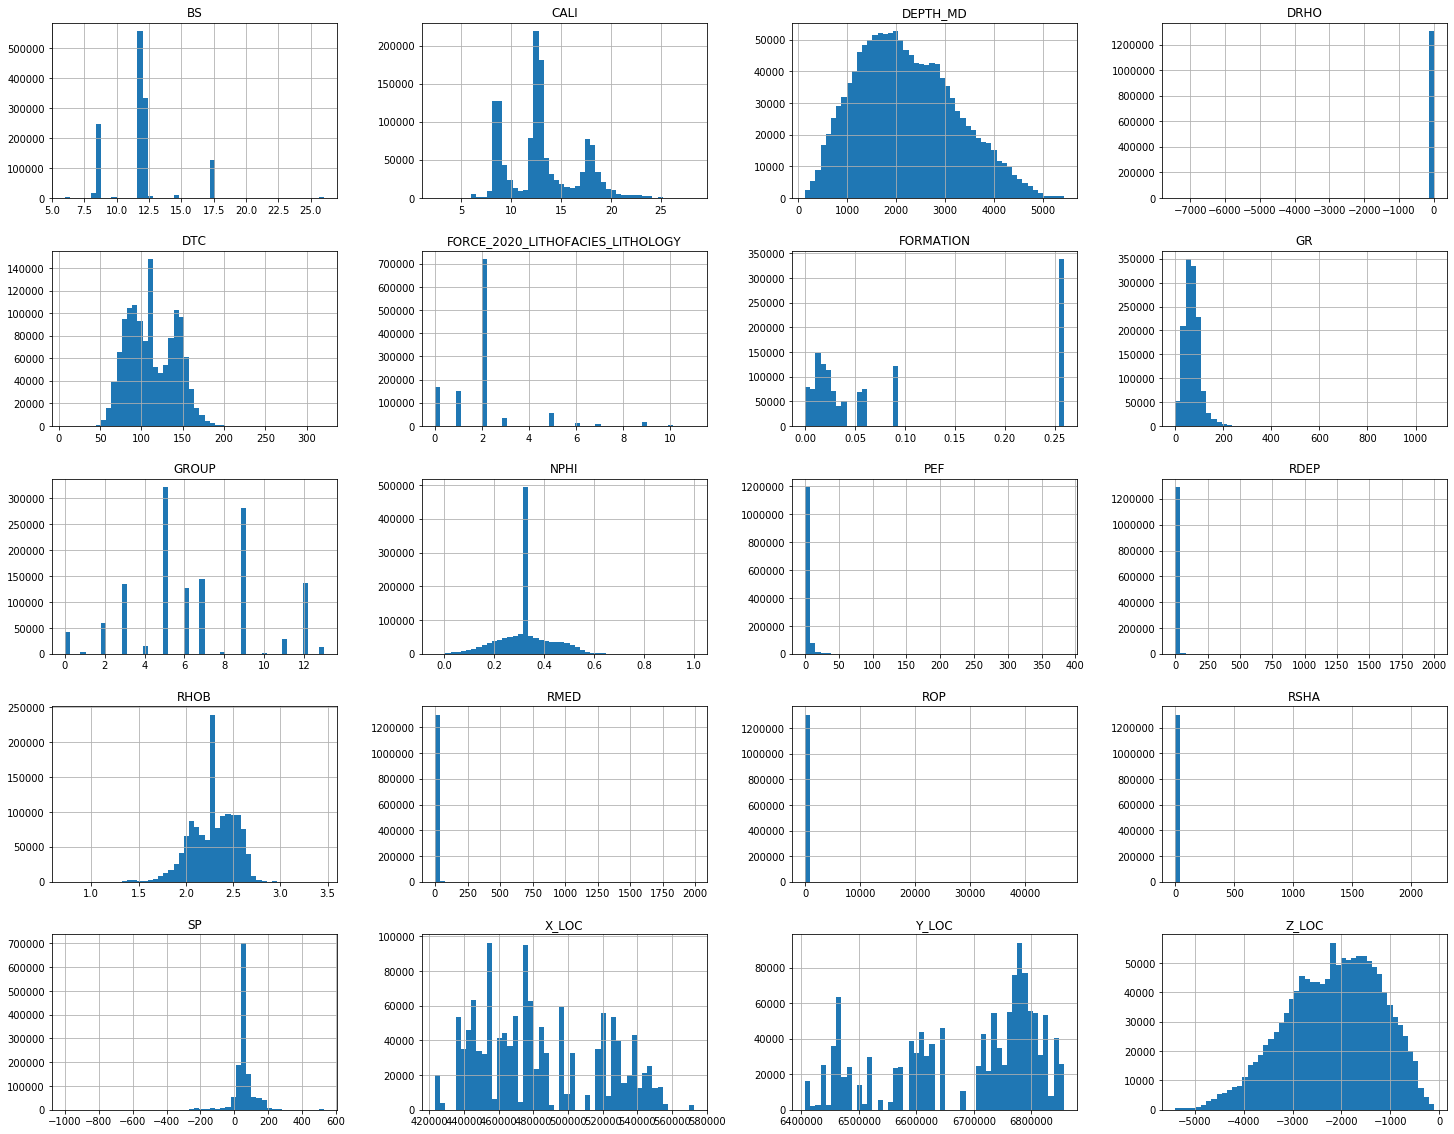

In [50]:
rob_train_test.hist(bins=50,figsize=(25,20))

In [51]:
# def outliers(data):
#     import math
#     for i in data.columns:
        
        
#         #set upper and lower
#         random_data_std = np.std(data[i])
#         random_data_mean = np.mean(data[i])
#         anomaly_cut_off = random_data_std * 3
    
#         lower_limit  = random_data_mean - anomaly_cut_off 
#         upper_limit = random_data_mean + anomaly_cut_off
#         print(f'The Lower limit for {i} is ',lower_limit)
        
        
#         #generating the outlier 
        
#         for 

In [52]:
# outliers(train_test1)

In [53]:
# import seaborn as sns 
# for i in train_test1.columns:
#     sns.boxplot(data=train_test1[i])

In [54]:
from sklearn.preprocessing import StandardScaler


scale= StandardScaler()

In [55]:
scaled_tt1= scale.fit_transform(train_test1)

In [56]:
sc_train_test =pd.DataFrame(scaled_tt1,columns=train_test1.columns)

In [57]:
from sklearn.preprocessing import RobustScaler


rob_scale= RobustScaler()

In [58]:
rob_scaled= rob_scale.fit_transform(rob_train_test)

In [59]:
rob_sc_train_test =pd.DataFrame(rob_scaled,columns=train_test1.columns)

In [60]:
rob_sc_train_test.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY
0,-1.105933,-0.614031,-1.390678,1.142035,0.0,0.920005,1.210799,0.0,0.047453,0.189955,-1.166438,0.311782,0.0,6.237092,0.972360,-1.441543,0.0,-0.880254,-26.109646,0.0
1,-1.105829,-0.614031,-1.390678,1.141928,0.0,0.920005,1.208662,0.0,0.050611,0.188194,-1.150118,0.289079,0.0,5.582239,0.961818,-1.470716,0.0,-0.880254,-25.897261,0.0
2,-1.105725,-0.614031,-1.390678,1.141821,0.0,0.920005,1.208662,0.0,0.054589,0.191143,-1.130534,0.181588,0.0,6.953306,0.953231,-1.469869,0.0,-0.879027,-26.079062,0.0
3,-1.105621,-0.614031,-1.390678,1.141714,0.0,0.920005,1.206971,0.0,0.052282,0.191597,-1.143950,0.134556,0.0,11.055769,0.952748,-1.474861,0.0,-0.834595,-26.619975,0.0
4,-1.105518,-0.614031,-1.390678,1.141607,0.0,0.920005,1.205873,0.0,0.043312,0.187995,-1.178520,0.106726,0.0,13.749492,0.952326,-1.462229,0.0,-0.684487,-27.139747,0.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff2e840a9d0>,
      dtype=object)

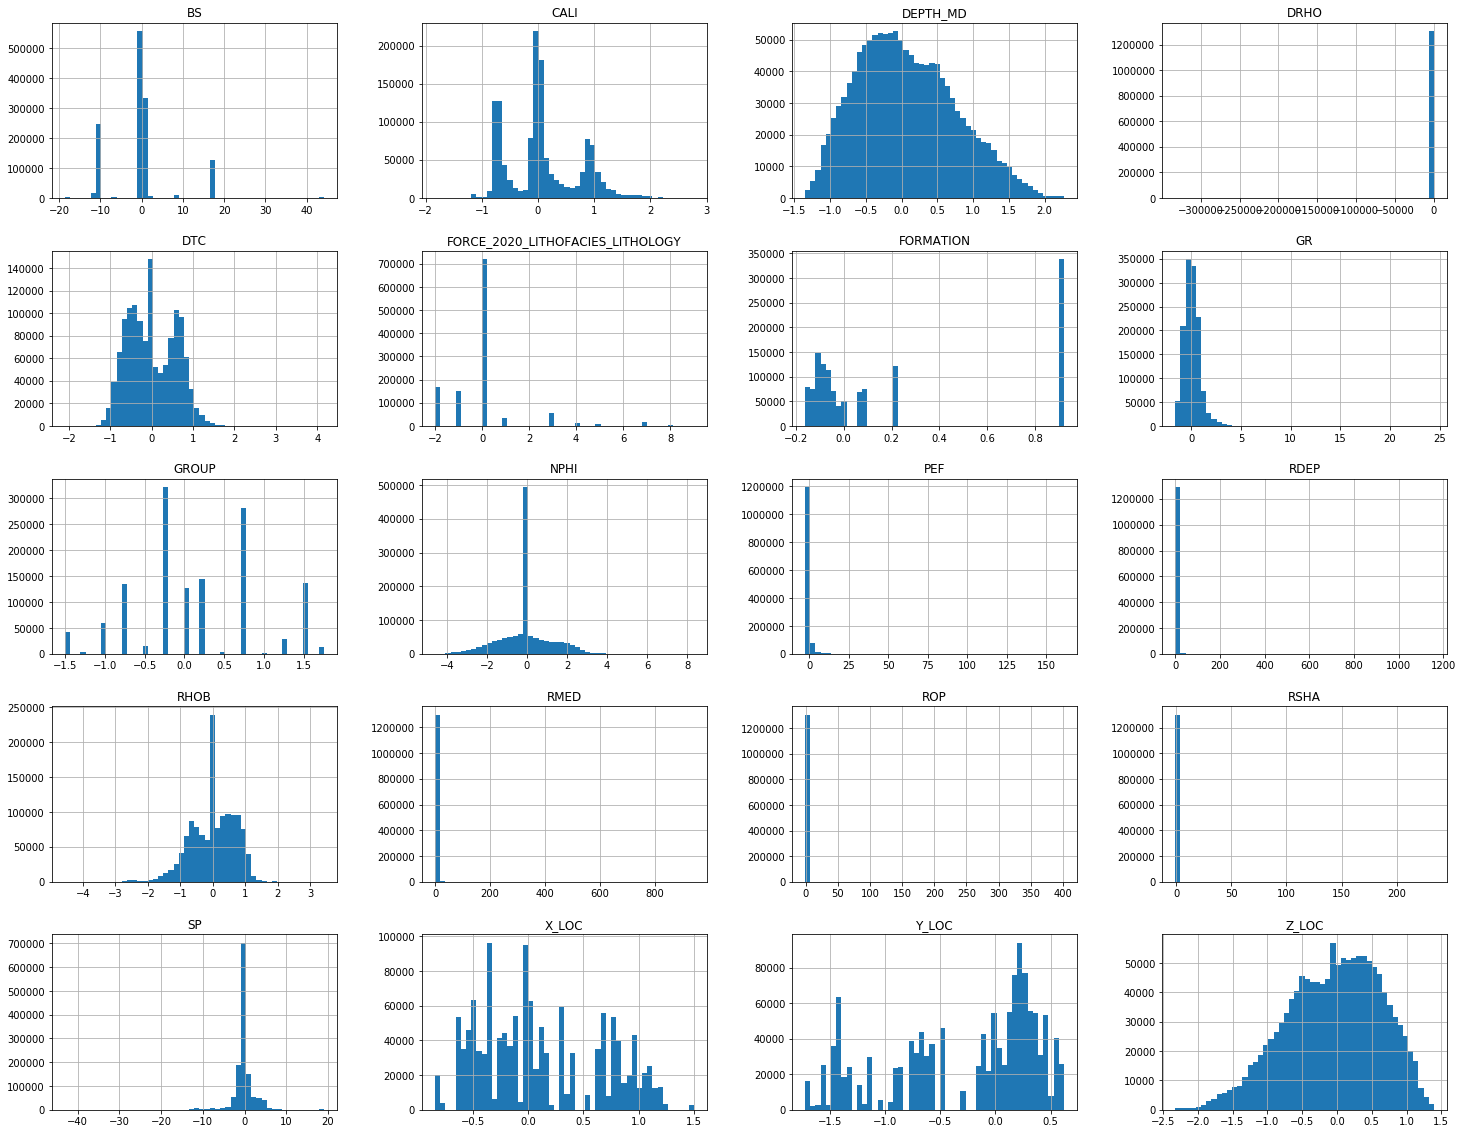

In [61]:
rob_sc_train_test.hist(bins=50,figsize=(25,20))

In [62]:
sc_train_test.head()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,RDEP,RHOB,GR,NPHI,PEF,DTC,SP,BS,ROP,DRHO,FORCE_2020_LITHOFACIES_LITHOLOGY
0,-1.711118,-1.318958,-1.656543,1.754638,-0.195621,1.644851,1.760491,0.00323,-0.063283,-0.075812,-1.723094,0.290950,0.013973,1.744206,1.675299,-0.552117,0.020227,-0.098392,-0.090352,0.030382
1,-1.710967,-1.318958,-1.656543,1.754481,-0.195621,1.644851,1.757156,0.00323,-0.063154,-0.075840,-1.699204,0.263336,0.013973,1.561300,1.656968,-0.563563,0.020227,-0.098392,-0.089623,0.030382
2,-1.710816,-1.318958,-1.656543,1.754324,-0.195621,1.644851,1.757156,0.00323,-0.062991,-0.075793,-1.670536,0.132593,0.013973,1.944251,1.642037,-0.563230,0.020227,-0.098246,-0.090247,0.030382
3,-1.710665,-1.318958,-1.656543,1.754166,-0.195621,1.644851,1.754518,0.00323,-0.063085,-0.075786,-1.690175,0.075387,0.013973,3.090103,1.641197,-0.565189,0.020227,-0.092983,-0.092104,0.030382
4,-1.710514,-1.318958,-1.656543,1.754009,-0.195621,1.644851,1.752805,0.00323,-0.063453,-0.075843,-1.740781,0.041537,0.013973,3.842481,1.640464,-0.560233,0.020227,-0.075201,-0.093888,0.030382


In [63]:
sc_train_test.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'],axis=1,inplace=True)

In [64]:
rob_sc_train_test.drop(['FORCE_2020_LITHOFACIES_LITHOLOGY'],axis=1,inplace=True)

In [65]:
# sc_train_test["FORCE_2020_LITHOFACIES_LITHOLOGY"]=train_test1["FORCE_2020_LITHOFACIES_LITHOLOGY"]

In [66]:
def splitter(df, train):
    train=train.shape[0]
    
    train_f = df.iloc[:train,:]
    test_f = df.iloc[train:,:]
    return train_f,test_f

In [67]:
trainer,tester = splitter(sc_train_test,train)

In [68]:
rob_trainer,rob_tester = splitter(rob_sc_train_test,train)

In [69]:
rob_trainer.shape

(1170511, 19)

In [70]:
trainer.shape

(1170511, 19)

In [71]:
tester.shape

(136786, 19)

SPlitting the data

In [72]:
X = trainer
y= train['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [73]:
X_rb = rob_trainer

In [74]:
y=y.map(lithology_numbers)

In [75]:
y

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,y_train,y_test = train_test_split(X,y, stratify=train['FORCE_2020_LITHOFACIES_LITHOLOGY'], test_size = .3)

In [78]:
X_train_rb,X_test_rb,y_train_rb,y_test_rb = train_test_split(X_rb,y, stratify=train['FORCE_2020_LITHOFACIES_LITHOLOGY'], test_size = .3)

## Applying the custom scoring function

In [79]:
A = np.load('penalty_matrix.npy')

In [80]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [81]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(random_state =42, class_weight='balanced')

In [82]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [83]:
y_pred = clf.predict(X_test)

In [84]:
score(y_test.values,y_pred)

-0.10999233954333426

In [85]:
clf.score(X_test,y_test)

0.9600517152018773

In [82]:
import pickle

SyntaxError: can't assign to function call (<ipython-input-76-6be80ebc940c>, line 1)

## Training the whole data set 

In [87]:
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [88]:
#Test predict

test_predict = clf.predict(tester)

In [89]:
#test model classifer


y_pred_1 = clf.predict(X_test)

In [90]:
score(y_test.values,y_pred_1)

0.0

In [91]:
clf.score(X_test,y_test)

1.0

In [95]:
pickle.dump(clf, open('baseLinemodel(rf).pkl', 'wb'))

In [96]:
#Baseline Standard scaler


pickle.dump(scale, open('StandardScaler.pkl', 'wb'))

# Rob Scale

In [83]:
rb_clf = RandomForestClassifier(random_state=42,class_weight='balanced')

In [84]:
rb_clf.fit(X_train_rb,y_train_rb)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [85]:
rob_predict = rb_clf.predict(X_test_rb)

In [86]:
score(y_test_rb.values,rob_predict)

-0.10967232325418477

In [87]:
rb_clf.fit(X_rb,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [88]:
rob_predict = rb_clf.predict(rob_tester)

In [89]:
#test model classifer


rob_preds_1 = rb_clf.predict(X_test_rb)

In [92]:
rb_clf.score(X_test_rb,y_test_rb)

1.0

In [94]:
score(y_test_rb.values,rob_preds_1)

0.0

In [95]:
pickle.dump(rb_clf, open('baseLinemodel(2)ROBScale(rf).pkl', 'wb'))

In [96]:
#Baseline Standard scaler


pickle.dump(rob_scale, open('RobustScaler.pkl', 'wb'))

In [97]:
Lithpreds1= np.vectorize(category_to_lithology.get)(rob_predict)

In [98]:
Lithpreds1

array([65000, 65000, 65000, ..., 30000, 30000, 30000])

In [99]:
np.savetxt('submission2(rob).csv', Lithpreds1, header='lithology',comments='',fmt='%i')

## Converting the result to the format for submission

In [93]:
category_to_lithology = {y:x for x,y in lithology_numbers.items()}

In [79]:
Lithpreds= np.vectorize(category_to_lithology.get)(test_predict)

In [80]:
Lithpreds

array([65000, 65000, 65000, ..., 30000, 30000, 30000])

In [81]:
np.savetxt('submission1.csv', Lithpreds, header='lithology',comments='',fmt='%i')

## using the mapped y as the stratify

In [83]:
X_train1,X_test1,y_train1,y_test1 = train_test_split(X,y, stratify=y, test_size = .3)

In [85]:
y_pred_y = clf1.predict(X_test1)

# Working on improving the model.

In [77]:
n_estimators = [200, 400, 600, 800]
max_depth = [5, 7, 9, 12]
min_samples_split = [2, 5, 7]
min_samples_leaf = [2, 4, 6] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)


In [84]:
clf1 = RandomForestClassifier(max_depth=4, n_estimators=400, class_weight='balanced')

In [85]:
clf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
y_m_pred = clf1.predict(X_test)

In [87]:
score(y_test.values,y_m_pred)

-2.0485392448897066

In [89]:
trainer.to_csv('trainer.csv')

In [ ]:
tester.to_csv('tester.csv')

## Using the XGBoost classifier as another model.

In [67]:
import xgboost as xgb

In [68]:
from xgboost import XGBClassifier

In [71]:
xgb_clf= XGBClassifier(objective='multi:softmax')

In [72]:
xgb_clf.fit(X_train,y_train)

KeyboardInterrupt: 